<a href="https://colab.research.google.com/github/marvelous-koala/unlimited_power/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns

In [ ]:
#### n22

In [ ]:
raw_data = pd.read_csv('./raw_data/train/train.csv')

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     52560 non-null  int64  
 1   Hour    52560 non-null  int64  
 2   Minute  52560 non-null  int64  
 3   DHI     52560 non-null  int64  
 4   DNI     52560 non-null  int64  
 5   WS      52560 non-null  float64
 6   RH      52560 non-null  float64
 7   T       52560 non-null  int64  
 8   TARGET  52560 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 3.6 MB


용어 설명
DHI : Diffuse Horizontal Irradiance (평면 산란일사량)
    대충 뭔지는 모르겠지만 일사량의 일종인 듯 하다


DNI : Diffuse Normal Irradiance (법선면 직달일사량)
    대충 이것도 일사량의 일종인 듯 하다.


WS : Wind Speepd (풍속, 단위는 초속 m/s)


RH : Relative Humidity (상대습도)


T : Temperature (기온)
다행히도 결측치는 모두 없다.

In [ ]:
raw_data

Day  Hour  Minute  DHI  DNI   WS     RH   T  TARGET
0         0     0       0    0    0  1.5  69.08 -12     0.0
1         0     0      30    0    0  1.5  69.06 -12     0.0
2         0     1       0    0    0  1.6  71.78 -12     0.0
3         0     1      30    0    0  1.6  71.75 -12     0.0
4         0     2       0    0    0  1.6  75.20 -12     0.0
...     ...   ...     ...  ...  ...  ...    ...  ..     ...
52555  1094    21      30    0    0  2.4  70.70  -4     0.0
52556  1094    22       0    0    0  2.4  66.79  -4     0.0
52557  1094    22      30    0    0  2.2  66.78  -4     0.0
52558  1094    23       0    0    0  2.1  67.72  -4     0.0
52559  1094    23      30    0    0  2.1  67.70  -4     0.0

[52560 rows x 9 columns]

In [ ]:
plots = raw_data.iloc[:,3:]
plots

DHI  DNI   WS     RH   T  TARGET
0        0    0  1.5  69.08 -12     0.0
1        0    0  1.5  69.06 -12     0.0
2        0    0  1.6  71.78 -12     0.0
3        0    0  1.6  71.75 -12     0.0
4        0    0  1.6  75.20 -12     0.0
...    ...  ...  ...    ...  ..     ...
52555    0    0  2.4  70.70  -4     0.0
52556    0    0  2.4  66.79  -4     0.0
52557    0    0  2.2  66.78  -4     0.0
52558    0    0  2.1  67.72  -4     0.0
52559    0    0  2.1  67.70  -4     0.0

[52560 rows x 6 columns]

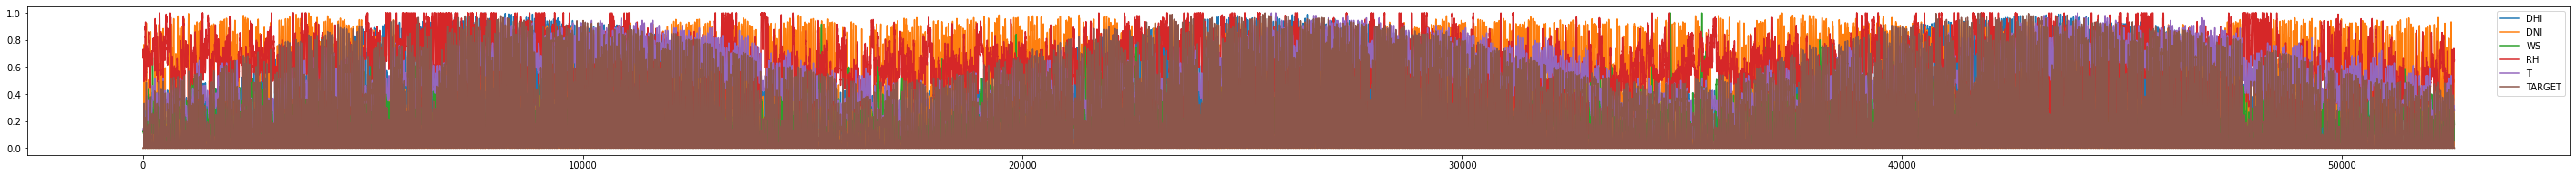

In [ ]:
# 단위를 맞추기 위해 0,1로 스케일링하여 시각화해봄.
# 뭔 모양인지 모르겠음.

scaler = MinMaxScaler()
plot_scaled = pd.DataFrame(scaler.fit_transform(plots), columns=plots.columns)
plot_scaled.plot(figsize = (50,3))

DHI


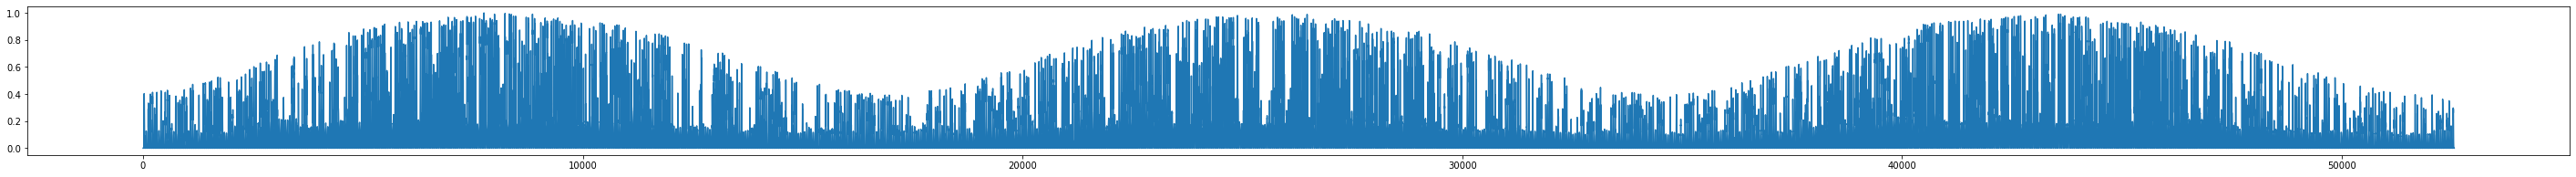

DNI


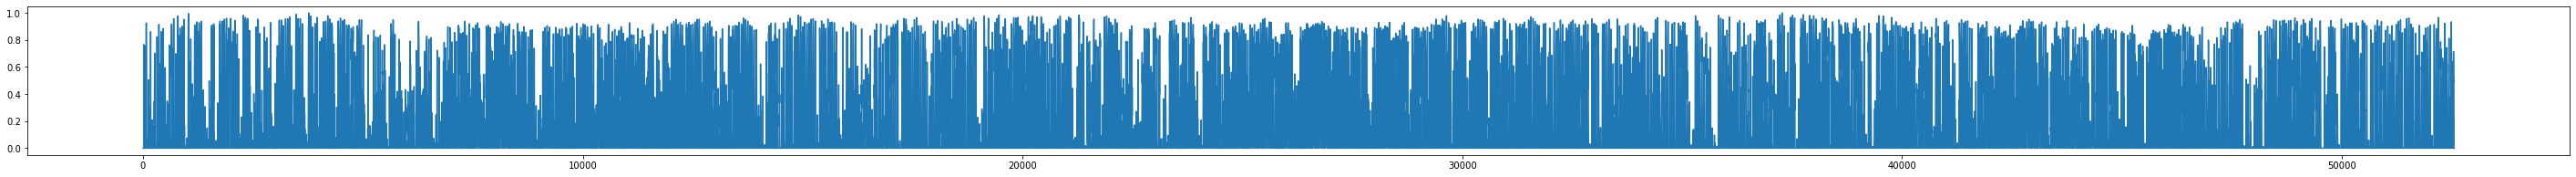

WS


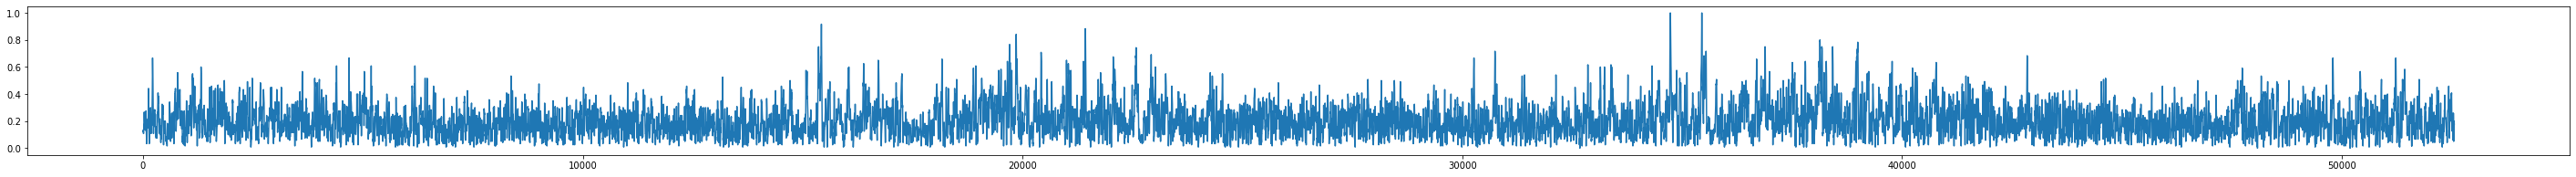

RH


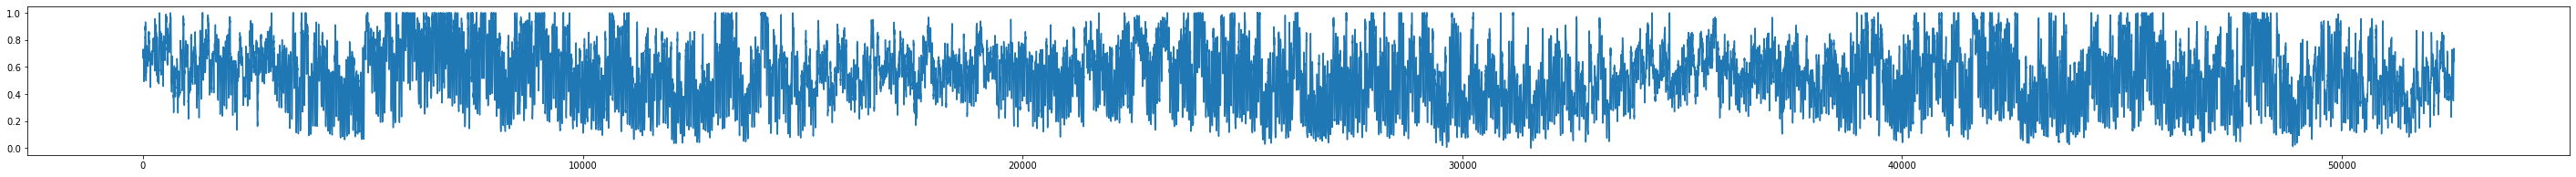

T


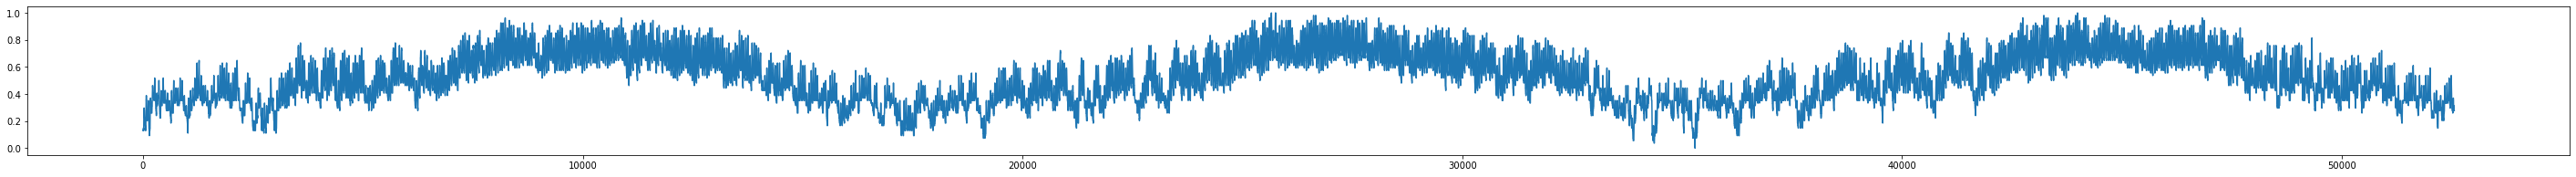

TARGET


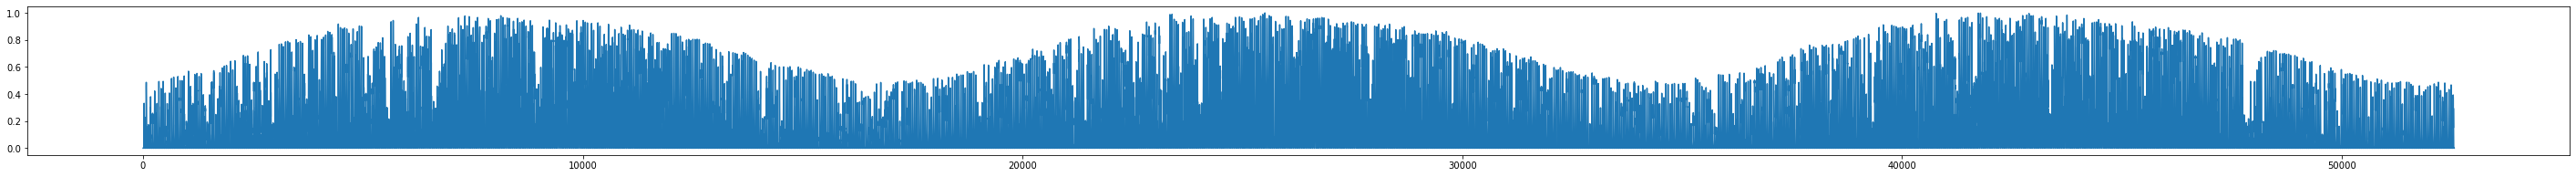

In [ ]:
# 일단 마지막 타겟과 가장 유사한 모양을 보이는 것은 DHI임.\
# 대충 18,000 ~ 19,000 틱을 주기로 순환하는 모양을 보임
# 1틱 = 30분, 하루는 48틱, 나눠보면 대충 1년 주기로 순환하는 듯(당연하게도)

x = list(plot_scaled.index)

for i in plot_scaled.columns:
  print(i)
  plt.figure(figsize=(50, 3))
  plt.plot(x, plot_scaled[i])
  plt.show()

In [ ]:
plot_scaled.corr()

DHI       DNI        WS        RH         T    TARGET
DHI     1.000000  0.288294  0.203286 -0.478503  0.457813  0.666908
DNI     0.288294  1.000000  0.219555 -0.611184  0.402460  0.833547
WS      0.203286  0.219555  1.000000 -0.230035  0.027693  0.238521
RH     -0.478503 -0.611184 -0.230035  1.000000 -0.532777 -0.677178
T       0.457813  0.402460  0.027693 -0.532777  1.000000  0.561990
TARGET  0.666908  0.833547  0.238521 -0.677178  0.561990  1.000000

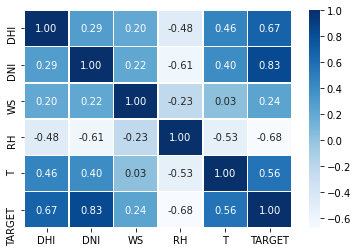

In [ ]:
# 변수와 Target 사이의 상관관계(corr) 확인

sns.heatmap(data = plot_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
# 회귀분석을 돌려서 대충 어떤 요인이 중요한지 알아본다
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

model = smf.ols(formula = 'TARGET ~ DHI + DNI + WS + RH + T', data = plots)
result = model.fit()
result.summary()

# 회귀결과 풍속(WS)는 P value 유의미하지 않음
# 5가지 변수를 알면 그날의 발전량을 90% 설명할 수 있음
# 응용해서, Target(발전량)을 예측하는 모델이 아니라, 다른 5개 변수를 예측해서 발전량을 회귀하는 모형도 가능할 듯.
############ 영향을 크게 미치는 요인, coef 절대값이 큰 순으로 온도 > DHI > DNI > RH > WS(WS는 유의미하지 못함)

# 만약에 모델링이 잘 되어서 학습시간도 줄여야 한다면, 변수간의 학습 가중치를 저런 순서로 주는 방법도 고려가 가능할 듯.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                 9.452e+04
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        20:56:25   Log-Likelihood:            -1.8484e+05
No. Observations:               52560   AIC:                         3.697e+05
Df Residuals:                   52554   BIC:                         3.698e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0560      0.190     -5.552      0.000      -1.429      -0.683
DHI            0.1053      0.000    256.787      0.000       0.105       0.106
DNI            0.0488      0.000    373.885      0.000       0.048       0.049
WS            -0.0117      0.026     -0.447      0.655      -0.063       0.040
RH            -0.0255      0.002    -10.952      0.000      -0.030      -0.021
T              0.2265      0.004     51.697      0.000       0.218       0.235
==============================================================================
Omnibus:                     5583.399   Durbin-Watson:                   0.314
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25922.073
Skew:                           0.431   Prob(JB):                         0.00
Kurtosis:                       6.331   Cond. No.                     2.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## 혹시나 버릴 변수가 있는지 보기 위해 다중공선정(VIF) 검정
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('TARGET ~ DHI + DNI + WS + RH + T', data = plots, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(0)

# 10을 넘으면 다중공선성 심함, 7을 넘으면 주의요망
# 현재 1~5번이 모두 1 or 2이므로 다중공선성 없음.

VIF Factor   features
0        29.0  Intercept
1         1.0        DHI
2         2.0        DNI
3         1.0         WS
4         2.0         RH
5         2.0          T

In [ ]:
# 52560/48은 총 1095일이고 이를 3으로 나누면 365다. 따라서 기막히게 3년치 자료가 주어져있음을 알 수 있따.
# 그런고로 데이터가 너무 크기 때문에 3년치로 나눈다.

k = 17520
year_1 = plot_scaled.iloc[0:k,:]
year_2 = plot_scaled.iloc[k:2*k,:]
year_3 = plot_scaled.iloc[2*k:3*k,:]